## Проект: Принятие решений в бизнесе

В рамках данного проекта мы исследуем ряд гипотез для увеличения выручки

Файл /datasets/hypothesis.csv. 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Импортируем библиотеки которые могут нам понадобиться:
* Pandas
* Seaborn
* NumPy
* Matplotlib
* SciPy

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
pd.options.display.max_colwidth = 120

# Часть 1

## Займемся приоритезацией гипотез

Загружаем датасет с параметрами гипотез

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Расчитываем ICE для каждой гипотезы

In [6]:
hypothesis['ICE'] = round((hypothesis.impact * hypothesis.confidence) / hypothesis.efforts,1)

Теперь расчитаем RICE для каждой гипотезы

In [7]:
hypothesis['RICE'] = round((hypothesis.reach * hypothesis.confidence * hypothesis.impact)/ hypothesis.efforts,1)

In [8]:
hypothesis.sort_values(by='ICE', ascending=False).reset_index(drop=True)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


In [9]:
hypothesis.sort_values(by='RICE', ascending=False).reset_index(drop=True)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


При приоритезации гипотез по фрэймворку ICE первые четыре места заняли гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". При приоретизации гипотез по RICE в четверку вошли: . "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" сильно потеряла свои позиции, т.к. хоть она и сильно влияет на пользователей, однако охват вовлеченых пользователей очень низок. Гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" наоборот поднялась в приоритете, так как у нее неплохой охват.

# Часть 2

Цель данного теста - определить может ли введение изменений, проверяемых на группе В статистически значимо увеличить прибыль

Загружаем необходимые датасеты

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
orders.date = orders.date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.date = visitors.date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

Мы изменили формат даты на date_time, проверили датасет на пропуски и дубликаты. Они отсутствуют

Создадим датасет с уникальными парами дат и групп

In [18]:
date_groups = orders[['date', 'group']].drop_duplicates()

##  Кумулятивная выручка

Проверим, есть ли пользователи входящие в обе группы

In [19]:
temp_ = orders.groupby('visitorId', as_index=False)['group'].nunique()

In [20]:
len(temp_[temp_.group > 1].visitorId.unique())

58

In [21]:
list_temp = temp_[temp_.group > 1].visitorId.unique()

In [22]:
orders.query("visitorId in @list_temp").sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


Таких пользователей 58. Удалим их из датасета

In [23]:
orders = orders.query("visitorId not in @list_temp")

Посчитаем кумулятивную выручку по дням и группам.

In [24]:
orders_agg = date_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
orders_agg

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
496,2019-08-29,B,510,490,4746610
730,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


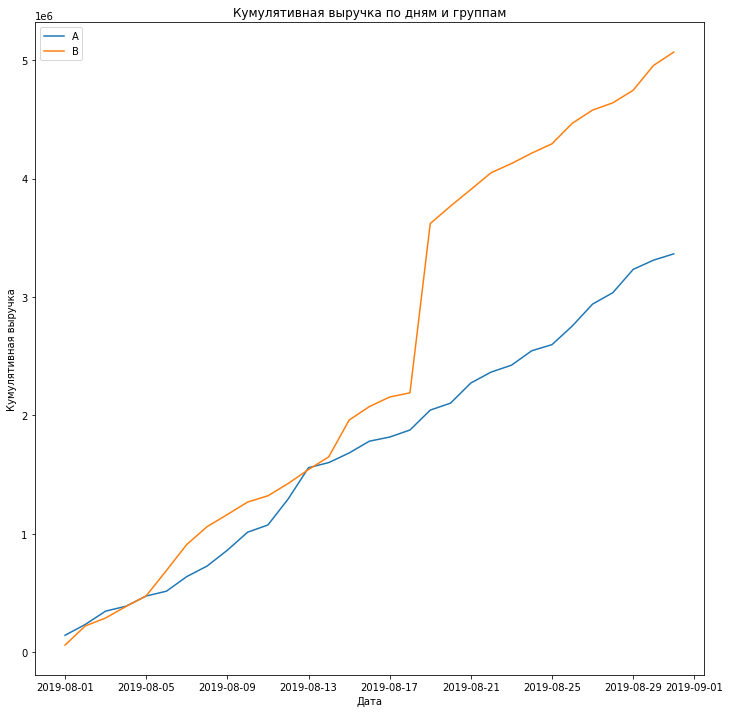

In [26]:
plt.figure(figsize=(12,12))
plt.plot(orders_agg[orders_agg.group == 'A'].date, orders_agg[orders_agg.group == 'A'].revenue, label = 'А')
plt.plot(orders_agg[orders_agg.group == 'B'].date, orders_agg[orders_agg.group == 'B'].revenue, label = "B")
plt.legend()
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show()

По графику видно, что группа B имела большую кумулятивную выручку, хотя и держалась вблизи с выручкой группы А. Примерно 18.08.19 выручка группы В резко выросла. Вероятно это связано с совершением аномально дорогой покупки или аномально большого кол-ва заказов

## Кумулятивный средний чек

Добавим в нашу таблицу колонку с кумулятивным средним чеком и пострим график

In [27]:
orders_agg['mean_costs'] = round(orders_agg.revenue / orders_agg.transactionId, 2)

In [28]:
orders_agg

,date,group,transactionId,visitorId,revenue,mean_costs
55,2019-08-01,A,23,19,142779,6207.78
66,2019-08-01,B,17,17,59758,3515.18
175,2019-08-02,A,42,36,234381,5580.50
173,2019-08-02,B,40,39,221801,5545.02
291,2019-08-03,A,66,60,346854,5255.36
...,...,...,...,...,...,...
496,2019-08-29,B,510,490,4746610,9307.08
730,2019-08-30,A,460,437,3311413,7198.72
690,2019-08-30,B,531,511,4955833,9333.02
958,2019-08-31,A,468,445,3364656,7189.44


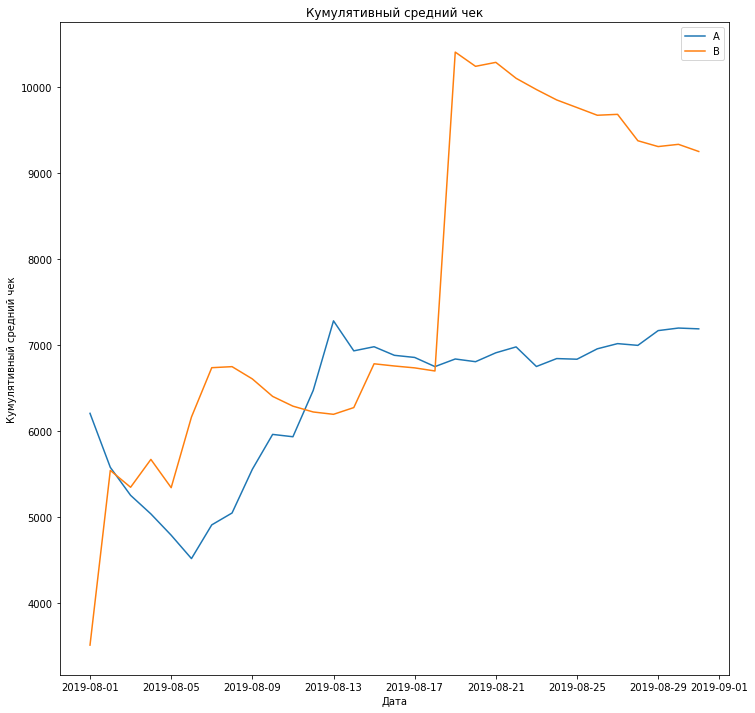

In [29]:
plt.figure(figsize=(12,12))
plt.plot(orders_agg[orders_agg.group == 'A'].date, orders_agg[orders_agg.group == 'A'].mean_costs, label = 'А')
plt.plot(orders_agg[orders_agg.group == 'B'].date, orders_agg[orders_agg.group == 'B'].mean_costs, label = "B")
plt.legend()
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show()

По графику видно что в целом средний чек группы В больше чем группы А, но есть несколько пиков. 13.08 в группе А и 18.08 в группе В были аномально доргие покупки

## Относительное изменение кумулятивного чека

Построим график относительного изменения кумулятивного чека группы В к группе А

In [30]:
cumulative_a = orders_agg[orders_agg.group == 'A'][['date', 'group', 'mean_costs']].copy()
cumulative_b = orders_agg[orders_agg.group == 'B'][['date', 'group', 'mean_costs']].copy()

In [31]:
cumulative_merged = cumulative_a.merge(cumulative_b, on='date', suffixes=['_a', '_b'])

In [32]:
cumulative_merged.head()

,date,group_a,mean_costs_a,group_b,mean_costs_b
0,2019-08-01,A,6207.78,B,3515.18
1,2019-08-02,A,5580.50,B,5545.02
2,2019-08-03,A,5255.36,B,5349.07
3,2019-08-04,A,5039.35,B,5672.65
4,2019-08-05,A,4792.05,B,5344.36


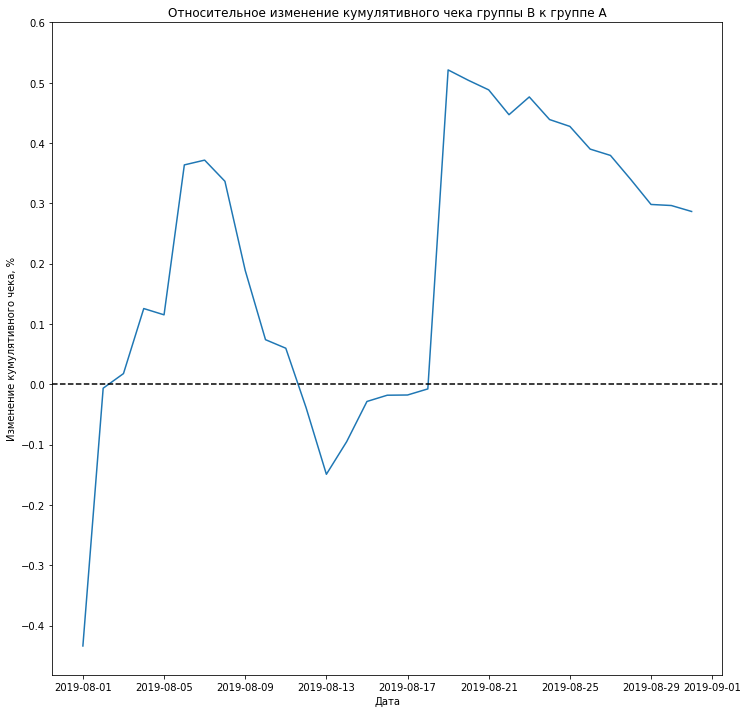

In [33]:
plt.figure(figsize=(12,12))
plt.plot(cumulative_merged.date, (cumulative_merged.mean_costs_b / cumulative_merged.mean_costs_a - 1))
plt.yticks(np.arange(-0.4, 0.7, step=0.1))
plt.title('Относительное изменение кумулятивного чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного чека, %')
plt.axhline(0, color='black', linestyle='--')
plt.show()

Большую часть времени средний чек группы В больше чем у группы А, за исключением 13.08. Наблюдаются те же аномалии, что и в других графиках

## Кумулятивное среднее количество заказов на посетителей

Посчитаем кумулятивное кол-во посетителей по группам

In [34]:
visitors_agg = date_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [35]:
visitors_agg

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [36]:
data_agg = orders_agg.merge(visitors_agg, on=['date', 'group'])
data_agg

,date,group,transactionId,visitorId,revenue,mean_costs,visitors
0,2019-08-01,A,23,19,142779,6207.78,719
1,2019-08-01,B,17,17,59758,3515.18,713
2,2019-08-02,A,42,36,234381,5580.50,1338
3,2019-08-02,B,40,39,221801,5545.02,1294
4,2019-08-03,A,66,60,346854,5255.36,1845
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,9307.08,17708
58,2019-08-30,A,460,437,3311413,7198.72,18037
59,2019-08-30,B,531,511,4955833,9333.02,18198
60,2019-08-31,A,468,445,3364656,7189.44,18736


In [37]:
cumulative_visitors_a = data_agg[data_agg.group == 'A'][['date', 'group', 'transactionId', 'visitors']]
cumulative_visitors_b = data_agg[data_agg.group == 'B'][['date', 'group', 'transactionId', 'visitors']]

In [38]:
cumulative_visitors = cumulative_visitors_a.merge(cumulative_visitors_b, on='date', suffixes=['_a','_b']).iloc[:,[0,2,3,5,6]]

In [39]:
cumulative_visitors.head()

,date,transactionId_a,visitors_a,transactionId_b,visitors_b
0,2019-08-01,23,719,17,713
1,2019-08-02,42,1338,40,1294
2,2019-08-03,66,1845,54,1803
3,2019-08-04,77,2562,68,2573
4,2019-08-05,99,3318,89,3280


объединим данные по заказам с данными по посетителям

In [40]:
sum_data = cumulative_merged.merge(cumulative_visitors, on='date').iloc[:,[0,2,4,5,6,7,8]]

In [41]:
sum_data.head()

,date,mean_costs_a,mean_costs_b,transactionId_a,visitors_a,transactionId_b,visitors_b
0,2019-08-01,6207.78,3515.18,23,719,17,713
1,2019-08-02,5580.50,5545.02,42,1338,40,1294
2,2019-08-03,5255.36,5349.07,66,1845,54,1803
3,2019-08-04,5039.35,5672.65,77,2562,68,2573
4,2019-08-05,4792.05,5344.36,99,3318,89,3280


Построим график кумулятивного среднего кол-ва заказов на посетителя по группам

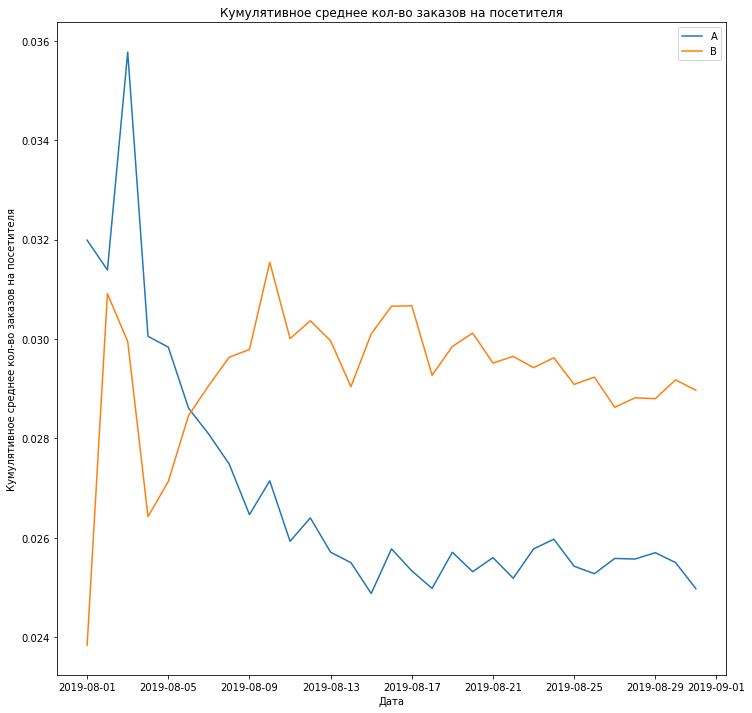

In [42]:
plt.figure(figsize=(12,12))
plt.plot(sum_data.date, sum_data.transactionId_a/sum_data.visitors_a, label = 'A')
plt.plot(sum_data.date, sum_data.transactionId_b/sum_data.visitors_b, label = 'B')
plt.legend()
plt.title('Кумулятивное среднее кол-во заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов на посетителя')
plt.show()

## Посчитаем относительное изменение кумулятивного среднего чека

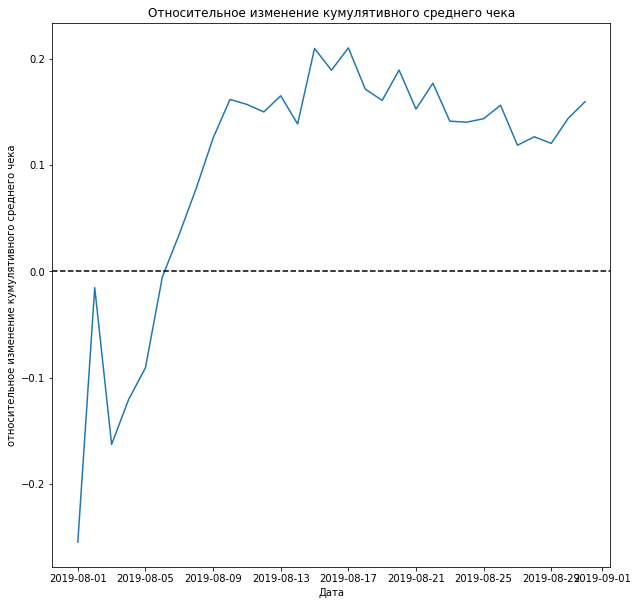

In [43]:
plt.figure(figsize=(10,10))
plt.plot(sum_data.date, ((sum_data.transactionId_b/sum_data.visitors_b) / (sum_data.transactionId_a/sum_data.visitors_a)) - 1)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('относительное изменение кумулятивного среднего чека')
plt.axhline(0, color='black', linestyle='--')
plt.show()

Как видно на графике большую часть времени средний чек группы В больше чем средний чек группы А

## Количество заказов на пользователя

In [44]:
count_orders = orders.groupby('visitorId', as_index=False)['transactionId'].nunique()

In [45]:
count_orders.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


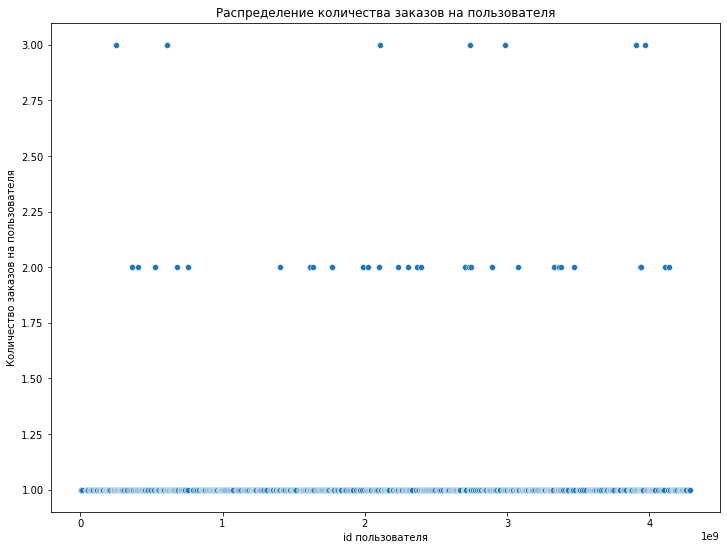

In [46]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = count_orders, x=count_orders.visitorId, y=count_orders.transactionId )
plt.title('Распределение количества заказов на пользователя')
plt.xlabel('id пользователя')
plt.ylabel('Количество заказов на пользователя')
plt.show()

По графику видно, что большинство пользователей совершило одну покупку, немало пользователей совершили две и три покупки, большее кол-во покупок - редкость

## Аномальные значения в кол-ве заказов на пользователя

Посчитаем перцентили для кол-ва заказов на пользователя

In [47]:
np.percentile(count_orders.transactionId, [95,99])

array([1., 2.])

95-й перцентиль равен двум, 99-й равен 4. Будем считать выбросами кол-во заказов больше двух.

## График стоимости заказов

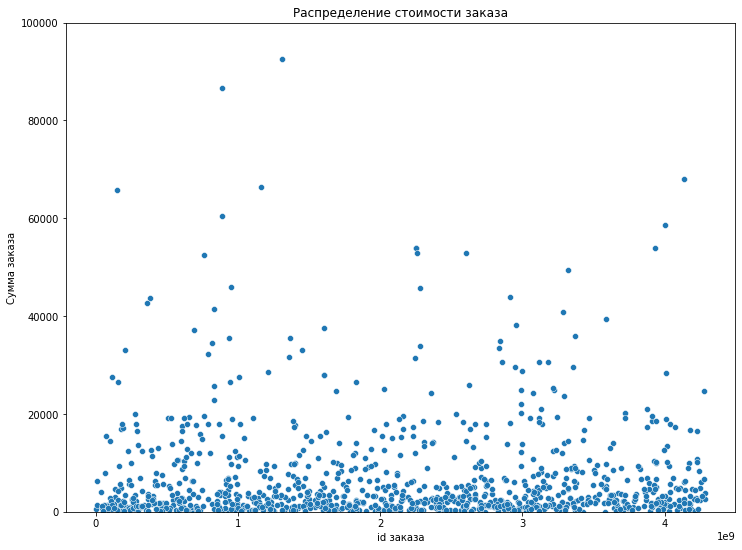

In [48]:
plt.figure(figsize=(12,9))
plt.ylim(0,100000)
sns.scatterplot(data = orders, x = orders.visitorId, y = orders.revenue)
plt.title('Распределение стоимости заказа')
plt.xlabel('id заказа')
plt.ylabel('Сумма заказа')
plt.show()

Судя по графику большинство значений лежит в пределах 25000. Более дорогие покупки - редкость

## Аномалии в стоимости заказов

In [49]:
np.percentile(orders.revenue, [95,99])

array([26785., 53904.])

95-й перцентиль равен 28000, 99-й перцентиль равен 58233.2. Будем считать выбросами стоимость покупки больше 28000

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по сырым данным

Нулевая гипотеза: среднее кол-во заказов на пользователя для группы А и В не отличаются.  Альтернативная гипотеза: среднее кол-во заказов на пользователя для группы А и В отличаются. Уровень значимости - а=0,05

In [50]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Создадим таблицу для A/B теста. Посчитаем кол-во заказов для каждого покупателя и добавим к ним кол-во посетителей со значением 0.

In [51]:
orders_samp_a = orders[orders.group == 'A'].groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_samp_b = orders[orders.group == 'B'].groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_samp_a.columns = ['visitor', 'orders']
orders_samp_b.columns = ['visitor', 'orders']

In [52]:
sample_a = pd.concat([orders_samp_a['orders'], pd.Series(0, 
                                               index=np.arange(visitors[visitors.group == 'A'].visitors.sum() - len(orders_samp_a.orders)),
                                               name='orders')], 
                     axis=0)

In [53]:
sample_b = pd.concat([orders_samp_b['orders'], pd.Series(0, 
                                               index=np.arange(visitors[visitors.group == 'B'].visitors.sum() - len(orders_samp_b.orders)),
                                               name='orders')], 
                     axis=0)

In [54]:
st.mannwhitneyu(sample_a, sample_b)[1]

0.011018084110014696

In [55]:
sample_a.mean()

0.02497865072587532

In [56]:
sample_b.mean()

0.02897018397124128

In [57]:
sample_b.mean() / sample_a.mean() - 1

0.1597977924896936

По сырым данным можно сказать, что в группе В среднее кол-во заказов на пользователя на 15,9% больше чем в группе А. Разница статистически значима(pvalue=0.01, что позволяет отвергнуть нулевую гипотезу). Показатель для группы А 0.024, для группы В 0.029

## Статистическая значимость различий в среднем чеке между группами по сырым данным

Нулевая гипотеза: средний чек для группы А и В не отличаются.  Альтернативная гипотеза: средний чек для группы А и В отличаются Уровень значимости - а=0,05

In [58]:
st.mannwhitneyu(orders[orders.group == 'A'].revenue, orders[orders.group == 'B'].revenue) 

MannwhitneyuResult(statistic=129236.5, pvalue=0.8294908998149533)

In [59]:
orders[orders.group == 'B'].revenue.mean()

9249.94890510949

In [60]:
orders[orders.group == 'A'].revenue.mean()

7189.4358974358975

In [61]:
orders[orders.group == 'B'].revenue.mean() / orders[orders.group == 'A'].revenue.mean() - 1

0.28660287636871096

По сырым данным можно сказать, что в группе В средний чек на 28,6% больше чем в группе А. Однако эта разница статистически не значима(pvalue=0.83, что не позволяет отвергнуть нулевую гипотезу). Показатель для группы А 7189, для группы В 9250. Такая разница с отсутствием статистичекской значимости говорит о влиянии выбросов

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по подготовленным данным

Нулевая гипотеза: среднее кол-во заказов на пользователя для группы А и В не отличаются.  Альтернативная гипотеза: среднее кол-во заказов на пользователя для группы А и В отличаются. Уровень значимости - а=0,05

Создадим список "аномальных клиентов".

In [62]:
anomaly_id = pd.concat([orders[orders.revenue > 28000].visitorId,
                        orders.groupby('visitorId', as_index=False)['transactionId'].nunique().query("transactionId > 2").visitorId],
                       axis=0).drop_duplicates()
anomaly_id.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [63]:
anomaly_id.shape[0]

55

Всего 55 "аномальных клиента"

Подготовим данные для А/В теста

In [64]:
orders_samp_a = orders.query("group == 'A' and visitorId not in @anomaly_id")\
.groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_samp_b = orders.query("group == 'B' and visitorId not in @anomaly_id")\
.groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_samp_a.columns = ['visitor', 'orders']
orders_samp_b.columns = ['visitor', 'orders']

In [65]:
sample_a = pd.concat([orders_samp_a['orders'], pd.Series(0, 
                                               index=np.arange(visitors[visitors.group == 'A'].visitors.sum() - len(orders_samp_a.orders)),
                                               name='orders')], 
                     axis=0)

In [66]:
sample_b = pd.concat([orders_samp_b['orders'], pd.Series(0, 
                                               index=np.arange(visitors[visitors.group == 'B'].visitors.sum() - len(orders_samp_b.orders)),
                                               name='orders')], 
                     axis=0)

Посчитаем значимость различий в группах по отфильтрованым показателям используя критерий Манна- Уитни

In [67]:
st.mannwhitneyu(sample_a, sample_b)[1]

0.009471250141377159

Среднее кол-во заказов в группе А

In [68]:
sample_a.mean()

0.022950469684030743

Среднее кол-во заказов в группе В

In [69]:
sample_b.mean()

0.02727849439627828

In [70]:
sample_b.mean() / sample_a.mean() - 1

0.1885810953689997

По подготовленным данным можно сказать, что в группе В среднее кол-во заказов на пользователя на 18.9% больше чем в группе А. Разница статистически значима(pvalue=0.009, что позволяет отвергнуть нулевую гипотезу). Показатель для группы А0.023, для группы В 0.027

## Статистическая значимость различий в среднем чеке между группами по подготовленным данным

Нулевая гипотеза: средний чек для группы А и В не отличаются. Альтернативная гипотеза: средний чек для группы А и В отличаются Уровень значимости - а=0,05

In [71]:
orders.query("group == 'A' and visitorId not in @anomaly_id")

,transactionId,visitorId,date,revenue,group
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A
14,3859315276,1565034404,2019-08-15,10980,A
...,...,...,...,...,...
1185,948555526,2710193528,2019-08-14,730,A
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1193,2203539145,370388673,2019-08-14,3190,A


In [72]:
st.mannwhitneyu(orders.query("group == 'A' and visitorId not in @anomaly_id").revenue, 
                orders.query("group == 'B' and visitorId not in @anomaly_id").revenue)[1]

0.7616880562749192

In [73]:
orders.query("group == 'A' and visitorId not in @anomaly_id").revenue.mean()

5102.511627906977

In [74]:
orders.query("group == 'B' and visitorId not in @anomaly_id").revenue.mean()

4987.9631782945735

In [75]:
orders.query("group == 'B' and visitorId not in @anomaly_id").revenue.mean() /\
orders.query("group == 'A' and visitorId not in @anomaly_id").revenue.mean() - 1

-0.022449424512020366

По подготовленным данным можно сказать, что в группе В средний чек на 2.2% меньше чем в группе А. Однако эта разница статистически не значима(pvalue=0.76, что не позволяет отвергнуть нулевую гипотезу) из-за влияния выбросов. Показатель для группы А 5103, для группы В 4988

## Выводы по тесту

Хотя статистически значимой разницы в среднем чеке для пользователей из группы А и группы В обнаружено не было, была обнаружена статистически значимая разница в кол-ве заказов на посетителя(в группе B на 18.9% больше чем в группе А). В общем тест можно признать успешным, введение модели В позволит увеличить количество заказов на посетителя, тем самым при неизменном среднем чеке, количество заказов увеличится, что приведет к увеличению прибыли.